In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)
custom_palette = [
    "#D9ED92",  # verde claro amarelado
    "#B5E48C",  # verde claro
    "#99D98C",  # verde médio
    "#76C893",  # verde esverdeado
    "#52B69A",  # verde-água
    "#34A0A4",  # verde-azulado
    "#168AAD",  # azul esverdeado
    "#1A759F",  # azul médio
    "#1E6091",  # azul escuro
    "#184E77"   # azul bem escuro
]

# exam_palette = ["#FFFF00", "#99D98C", "#1A759F"]

Importando base de dados

In [3]:
df_students = pd.read_csv("student-db/student-final.csv")
display(df_students)

,sex,age,address,internet,Medu,Fedu,famrel,health,reason,higher,...,failures_mat,failures_por,absences_mat,absences_por,G1_mat,G1_por,G2_mat,G2_por,G3_mat,G3_por
0,F,18,U,no,4,4,4,3,course,yes,...,0,0,6,4,5,0,6,11,6,11
1,F,17,U,yes,1,1,5,3,course,yes,...,0,0,4,2,5,9,5,11,6,11
2,F,15,U,yes,1,1,4,3,other,yes,...,3,0,10,6,7,12,8,13,10,12
3,F,15,U,yes,4,2,3,5,home,yes,...,0,0,2,0,15,14,14,14,15,14
4,F,16,U,no,3,3,4,5,home,yes,...,0,0,4,0,6,11,10,13,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,F,18,U,yes,2,3,4,3,course,yes,...,0,0,4,0,11,11,10,12,10,14
327,F,18,U,yes,3,2,5,1,other,yes,...,0,0,7,4,13,14,13,16,14,17
328,M,18,R,yes,4,3,5,4,course,yes,...,0,0,9,4,16,15,15,14,16,17
329,M,18,U,yes,4,3,5,5,course,yes,...,0,0,0,0,10,14,10,13,9,14


Tabela de medidas de tendência central e disperção

In [ ]:
def descritive_measures(df:pd.DataFrame):    
    numeric_cols = ["failures_mat", "failures_por", "absences_mat", "absences_por",  "G1_mat", "G1_por", "G2_mat", "G2_por", "G3_mat", "G3_por"]
    numeric_df = df[numeric_cols]

    # Medidas de tendência central
    description = pd.DataFrame({
        "Média": numeric_df.mean(),
        "Mediana": numeric_df.median(),
        "Moda": numeric_df.mode().iloc[0],
        "Variância": numeric_df.var(),
        "Desvio Padrão": numeric_df.std(),
        "Amplitude": numeric_df.max() - numeric_df.min(),
    })

    return description

description = descritive_measures(df_students)
print("Medidas Descritivas")
display(description)


Histogramas

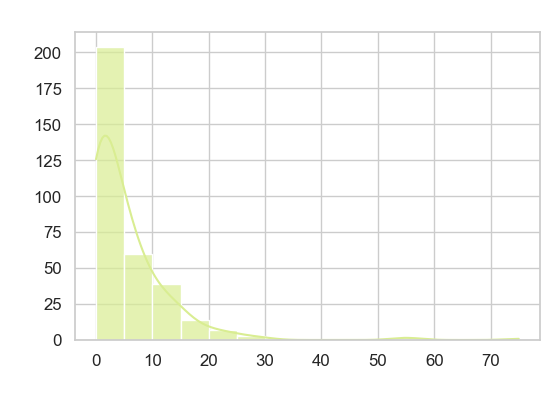

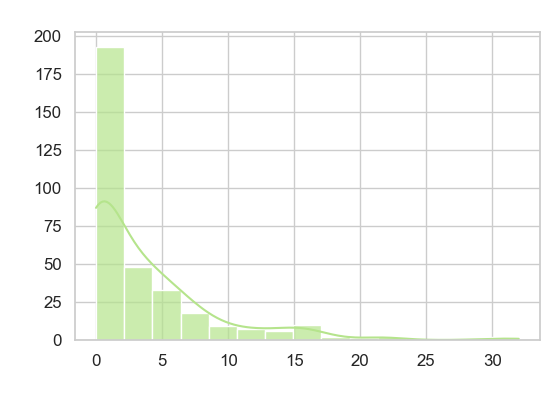

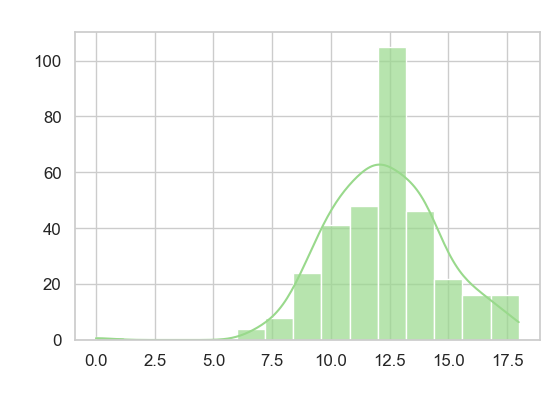

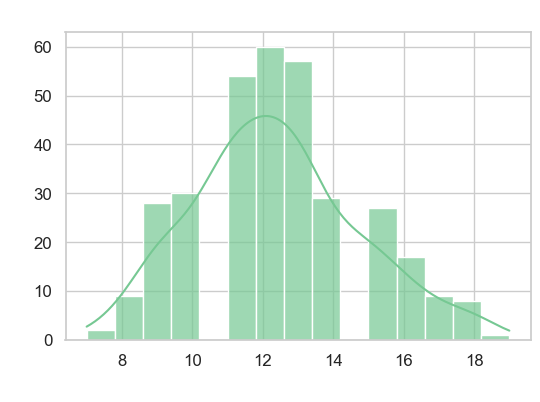

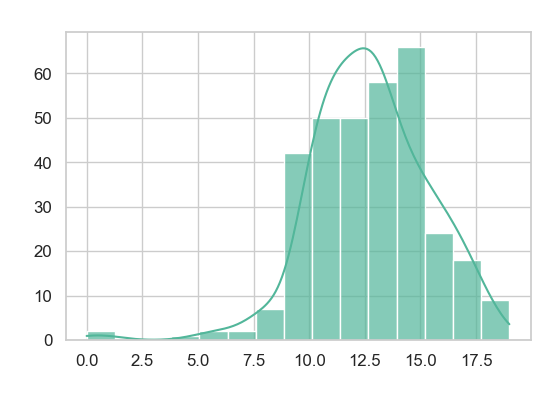

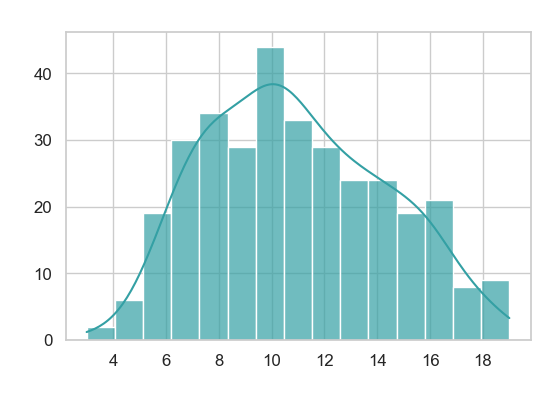

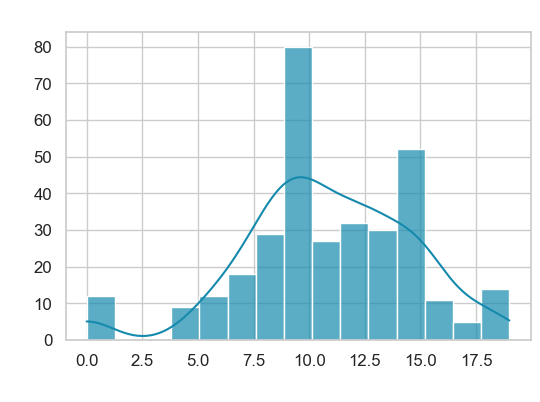

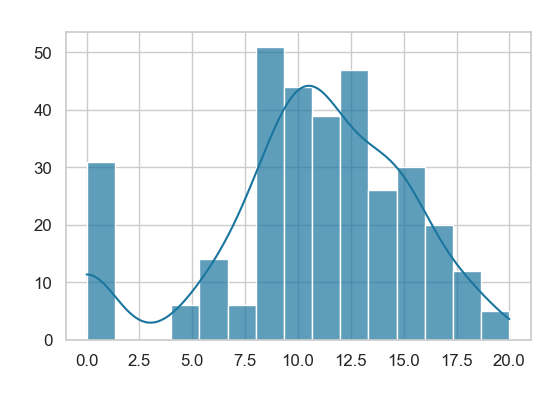

In [8]:
# def plot_histogram(df:pd.DataFrame, col:str): 
#     plt.figure(figsize=(6,4)) 
#     sns.histplot(df[col], kde=True, bins=15) 
#     plt.title(f"Histograma de {col}") 
#     plt.xlabel(col) 
#     plt.ylabel("Frequência") 
#     plt.show()

# plot_histogram(df_students, "absences_mat") 
# plot_histogram(df_students, "absences_por") 
# plot_histogram(df_students, "G1_por") 
# plot_histogram(df_students, "G2_por") 
# plot_histogram(df_students, "G3_por") 
# plot_histogram(df_students, "G1_mat") 
# plot_histogram(df_students, "G2_mat") 
# plot_histogram(df_students, "G3_mat")

def plot_histogram(df: pd.DataFrame, col: str, color: str):
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=15, color=color, alpha=0.7)
    plt.title(f"Histograma de {col}", color="white")
    plt.xlabel(col, color="white")
    plt.ylabel("Frequência", color="white")
    # Tornar fundo transparente
    plt.gca().set_facecolor("none")  # Fundo do gráfico
    plt.gcf().patch.set_alpha(0)      # Fundo da figura

    # Salvar com transparência
    plt.savefig("grafico_transparente.png", transparent=True, dpi=300)
    plt.show()

# Lista das colunas
cols = [
    "absences_mat", "absences_por",
    "G1_por", "G2_por", "G3_por",
    "G1_mat", "G2_mat", "G3_mat"
]

# Gerar gráficos, cada um com uma cor da paleta
for col, color in zip(cols, custom_palette):
    plot_histogram(df_students, col, color)

Boxplots de variáveis categóricas por nota

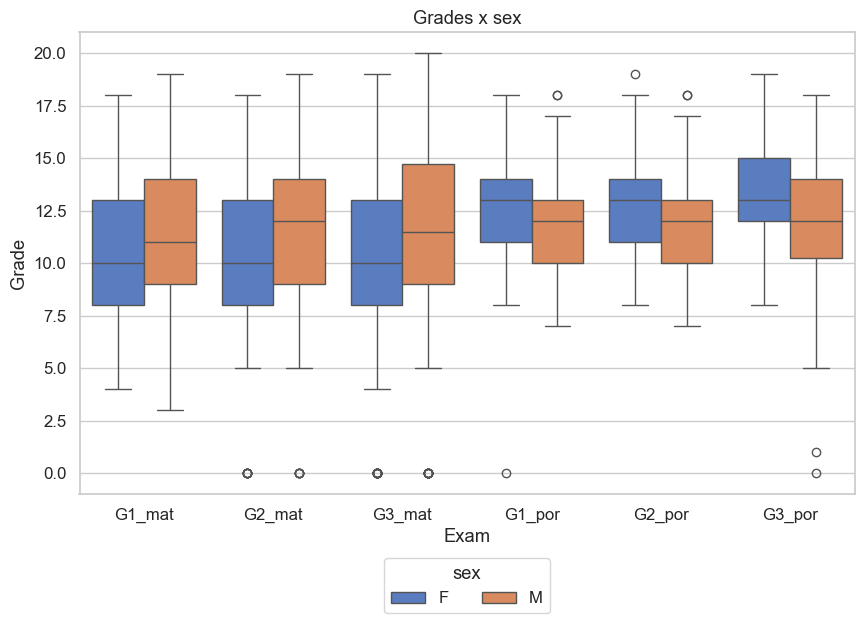

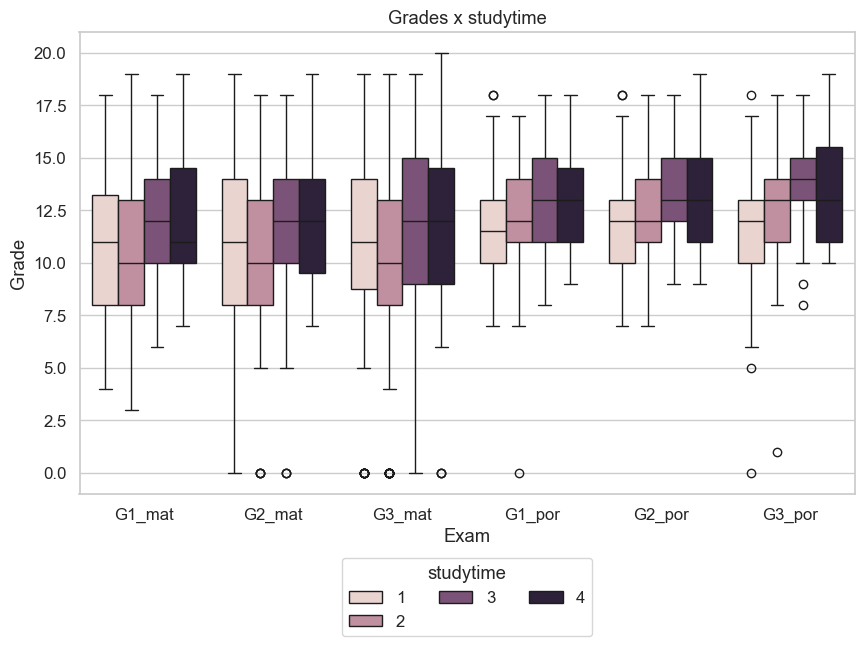

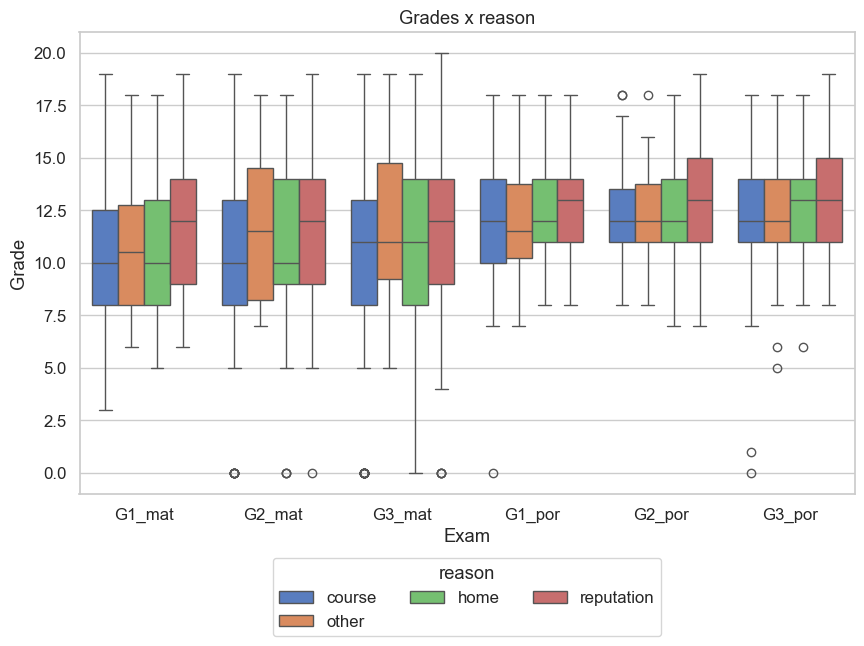

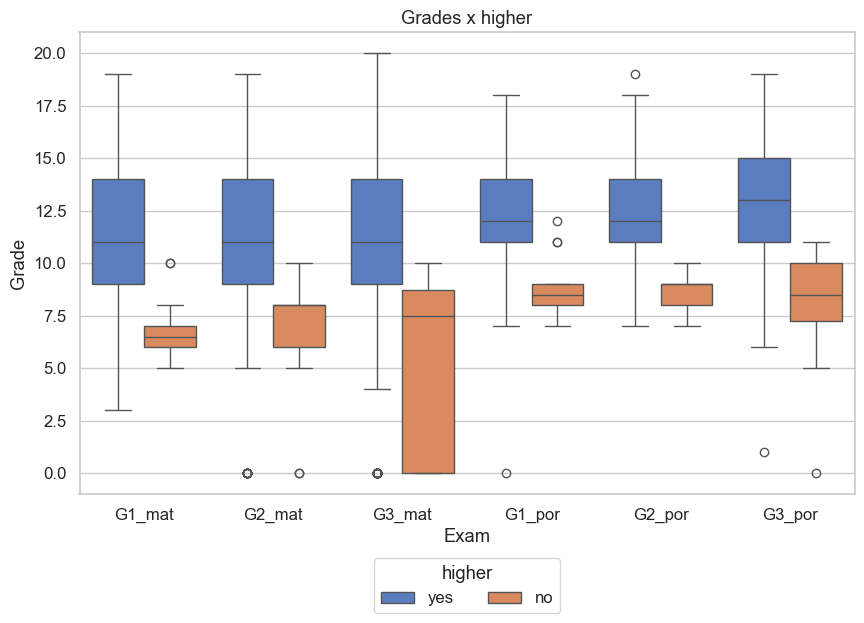

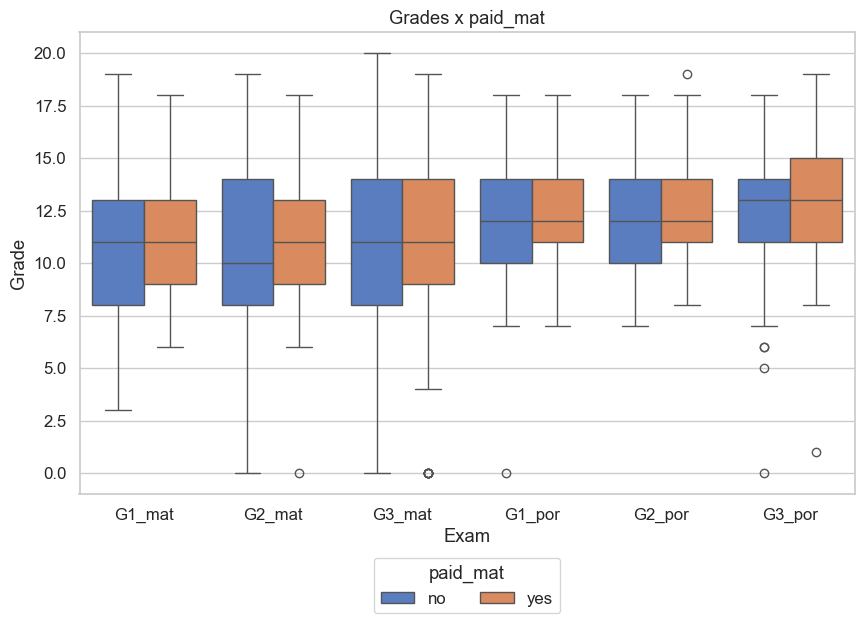

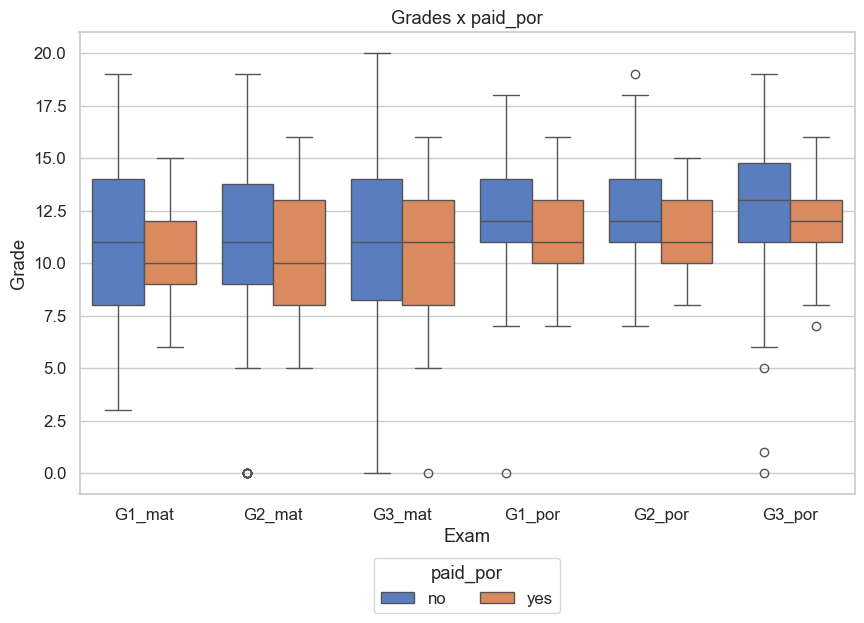

In [5]:
def plot_boxplot_all_exams(df: pd.DataFrame, group_col: str):
    grade_cols = ["G1_mat", "G2_mat", "G3_mat", "G1_por", "G2_por", "G3_por"]
    df_melted = df.melt(id_vars=[group_col], value_vars=grade_cols, var_name="Exam", value_name="Grade")

    plt.figure(figsize=(10,6))
    sns.boxplot(x="Exam", y="Grade", hue=group_col, data=df_melted)
    plt.title(f"Grades x {group_col}")
    plt.legend(title=group_col, loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=3)
    plt.show()

plot_boxplot_all_exams(df_students, "sex")
plot_boxplot_all_exams(df_students, "studytime")
plot_boxplot_all_exams(df_students, "reason")
plot_boxplot_all_exams(df_students, "higher")
plot_boxplot_all_exams(df_students, "paid_mat")
plot_boxplot_all_exams(df_students, "paid_por")

# def plot_boxplot_all_exams(df: pd.DataFrame, group_col: str):
#     grade_cols = ["G1_mat", "G2_mat", "G3_mat", "G1_por", "G2_por", "G3_por"]
#     df_melted = df.melt(id_vars=[group_col], value_vars=grade_cols, var_name="Exam", value_name="Grade")

#     plt.figure(figsize=(10,6))
#     ax = sns.boxplot(
#         x="Exam", y="Grade", hue=group_col, data=df_melted,
#         palette=custom_palette
#     )
    
#     # Ajustar cores das whiskers e caps para branco
#     for artist in ax.artists:  # cada box
#         artist.set_edgecolor("white")
#     for line in ax.lines:  # whiskers, caps e medianas
#         line.set_color("white")
#         line.set_linewidth(1.2)

#     # Ajustes visuais
#     plt.title(f"Grades x {group_col}", color="white")
#     plt.xlabel("Exam", color="white")
#     plt.ylabel("Grade", color="white")
#     plt.legend(
#         title=group_col, loc="upper center", bbox_to_anchor=(0.5, -0.12),
#         ncol=3, labelcolor="white", title_fontsize=11
#     )
#     # Tornar fundo transparente
#     plt.gca().set_facecolor("none")  # Fundo do gráfico
#     plt.gcf().patch.set_alpha(0)      # Fundo da figura

#     # Salvar com transparência
#     plt.savefig("grafico_transparente.png", transparent=True, dpi=300)
#     plt.show()

# # Chamadas de exemplo
# plot_boxplot_all_exams(df_students, "sex")
# plot_boxplot_all_exams(df_students, "studytime")
# plot_boxplot_all_exams(df_students, "reason")
# plot_boxplot_all_exams(df_students, "higher")
# plot_boxplot_all_exams(df_students, "paid_mat")
# plot_boxplot_all_exams(df_students, "paid_por")

Gráficos de dispersão entre notas

In [ ]:
def plot_scatterplot_simple(df:pd.DataFrame, x:str, y:str):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f"{y} x {x}")
    plt.show()

plot_scatterplot_simple(df_students, "G1_mat", "G2_mat")
plot_scatterplot_simple(df_students, "G1_mat", "G3_mat")
plot_scatterplot_simple(df_students, "G2_mat", "G3_mat")
plot_scatterplot_simple(df_students, "G1_por", "G2_por")
plot_scatterplot_simple(df_students, "G1_por", "G3_por")
plot_scatterplot_simple(df_students, "G2_por", "G3_por")
plot_scatterplot_simple(df_students, "G1_mat", "G1_por")
plot_scatterplot_simple(df_students, "G2_mat", "G2_por")
plot_scatterplot_simple(df_students, "G3_mat", "G3_por")

# def plot_scatterplot_simple(df: pd.DataFrame, x: str, y: str, color: str):
#     plt.figure(figsize=(5,5))
#     sns.scatterplot(x=x, y=y, data=df, color=color, s=50, alpha=0.9)  # pontos mais visíveis
#     plt.title(f"{y} x {x}", color="white")
#     plt.xlabel(x, color="white")
#     plt.ylabel(y, color="white")
#     # Tornar fundo transparente
#     plt.gca().set_facecolor("none")  # Fundo do gráfico
#     plt.gcf().patch.set_alpha(0)      # Fundo da figura

#     # Salvar com transparência
#     plt.savefig("grafico_transparente.png", transparent=True, dpi=300)
#     plt.show()

# # Lista dos pares de colunas
# pairs = [
#     ("G1_mat", "G2_mat"),
#     ("G1_mat", "G3_mat"),
#     ("G2_mat", "G3_mat"),
#     ("G1_por", "G2_por"),
#     ("G1_por", "G3_por"),
#     ("G2_por", "G3_por"),
#     ("G1_mat", "G1_por"),
#     ("G2_mat", "G2_por"),
#     ("G3_mat", "G3_por")
# ]

# # Gerar gráficos, cada um com uma cor da paleta
# for (x, y), color in zip(pairs, custom_palette):
#     plot_scatterplot_simple(df_students, x, y, color)

Gráficos de dispersão de notas por faltas

In [ ]:
def plot_scatterplot_all_math(df: pd.DataFrame, x: str):
    grade_cols = ["G1_mat", "G2_mat", "G3_mat"]
    df_melted = df.melt(id_vars=[x], value_vars=grade_cols, var_name="Exam", value_name="Grade")

    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x, y="Grade", hue="Exam", data=df_melted, palette="Set1")
    plt.title(f"Math grade x {x}")
    plt.legend(title="Exam")
    plt.show()

def plot_scatterplot_all_portuguese(df: pd.DataFrame, x: str):
    grade_cols = ["G1_por", "G2_por", "G3_por"]
    df_melted = df.melt(id_vars=[x], value_vars=grade_cols, var_name="Exam", value_name="Grade")

    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x, y="Grade", hue="Exam", data=df_melted, palette="Set1")
    plt.title(f"Portuguese grade x {x}")
    plt.legend(title="Exam")
    plt.show()

plot_scatterplot_all_math(df_students, "absences_mat")
plot_scatterplot_all_portuguese(df_students, "absences_por")
plot_scatterplot_all_math(df_students, "failures_mat")
plot_scatterplot_all_portuguese(df_students, "failures_por")

# def plot_scatterplot_all_math(df: pd.DataFrame, x: str):
#     grade_cols = ["G1_mat", "G2_mat", "G3_mat"]
#     df_melted = df.melt(id_vars=[x], value_vars=grade_cols,
#                         var_name="Exam", value_name="Grade")

#     plt.figure(figsize=(7,5))
#     sns.scatterplot(
#         x=x, y="Grade", hue="Exam", data=df_melted,
#         palette=exam_palette, s=50, alpha=0.9
#     )
#     plt.title(f"Math grade x {x}", color="white")
#     plt.xlabel(x, color="white")
#     plt.ylabel("Grade", color="white")
#     plt.legend(title="Exam", labelcolor="white")
#     # Tornar fundo transparente
#     plt.gca().set_facecolor("none")  # Fundo do gráfico
#     plt.gcf().patch.set_alpha(0)      # Fundo da figura

#     # Salvar com transparência
#     plt.savefig("grafico_transparente.png", transparent=True, dpi=300)
#     plt.show()

# def plot_scatterplot_all_portuguese(df: pd.DataFrame, x: str):
#     grade_cols = ["G1_por", "G2_por", "G3_por"]
#     df_melted = df.melt(id_vars=[x], value_vars=grade_cols,
#                         var_name="Exam", value_name="Grade")

#     plt.figure(figsize=(7,5))
#     sns.scatterplot(
#         x=x, y="Grade", hue="Exam", data=df_melted,
#         palette=exam_palette, s=50, alpha=0.9
#     )
#     plt.title(f"Portuguese grade x {x}", color="white")
#     plt.xlabel(x, color="white")
#     plt.ylabel("Grade", color="white")
#     plt.legend(title="Exam", labelcolor="white")
#     # Tornar fundo transparente
#     plt.gca().set_facecolor("none")  # Fundo do gráfico
#     plt.gcf().patch.set_alpha(0)      # Fundo da figura

#     # Salvar com transparência
#     plt.savefig("grafico_transparente.png", transparent=True, dpi=300)
#     plt.show()

# # Exemplos de chamada
# plot_scatterplot_all_math(df_students, "absences_mat")
# plot_scatterplot_all_portuguese(df_students, "absences_por")
# plot_scatterplot_all_math(df_students, "failures_mat")
# plot_scatterplot_all_portuguese(df_students, "failures_por")